# Unit 5 - Financial Planning


In [75]:
# Initial imports
import os
import requests
import json 
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [76]:
# Load .env enviroment variables
load_dotenv()

True

### Collect Crypto Prices Using the `requests` Library

In [77]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [78]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

# Fetch current BTC price
# Fetch current ETH price
btc_price = requests.get(btc_url).json()
btc_price
eth_price= requests.get(eth_url).json()
eth_price

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 113105166,
   'total_supply': 113105166,
   'max_supply': 0,
   'quotes': {'USD': {'price': 392.92,
     'volume_24h': 13285927715,
     'market_cap': 44361522835,
     'percentage_change_1h': -0.945546718460179,
     'percentage_change_24h': 5.84046605819445,
     'percentage_change_7d': 3.61519306959057,
     'percent_change_1h': -0.945546718460179,
     'percent_change_24h': 5.84046605819445,
     'percent_change_7d': 3.61519306959057},
    'CAD': {'price': 517.436348,
     'volume_24h': 17496238207.8835,
     'market_cap': 58419689421.4115,
     'percent_change_1h': -0.945546718460179,
     'percent_change_24h': 5.84046605819445,
     'percent_change_7d': 3.61519306959057}},
   'last_updated': 1603334088}},
 'metadata': {'timestamp': 1603334088,
  'num_cryptocurrencies': 1430,
  'error': None}}

In [79]:
# Compute current value of my crpto 
my_btc_value = btc_price["data"]["1"]["quotes"]["USD"]["price"] * my_btc
my_eth_value = eth_price["data"]["1027"]["quotes"]["USD"]["price"] * my_eth

# # Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15302.22
The current value of your 5.3 ETH is $2082.48


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [80]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [81]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [82]:
# Format current date as ISO format 
current_date = pd.Timestamp("2020-10-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get Data through setting up Get_Barset()
data_tickers = api.get_barset(
    tickers,
    timeframe,
    start=current_date,
    end=current_date
).df

# Get current closing prices for SPY and AGG
closing_prices = pd.DataFrame()
closing_prices["AGG"] = data_tickers["AGG"]["close"]
closing_prices["SPY"] = data_tickers["SPY"]["close"]

# Preview DataFrame
data_tickers.index = data_tickers.index.date
data_tickers

AGG                                       SPY                  \
              open    high     low    close   volume    open    high     low   
2020-10-19  117.81  117.86  117.72  117.787  3895071  348.62  349.33  341.04   

                              
             close    volume  
2020-10-19  342.02  51690440

In [83]:
# Pick AGG and SPY close prices
agg_close_price = float(data_tickers["AGG"]["close"])
spy_close_price = float(data_tickers["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.787
Current SPY closing price: $342.02


In [84]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17101.00
The current value of your 200 AGG shares is $23557.40


### Savings Health Analysis

In [85]:
# Set monthly household income
monthly_income = 12000

# Set up Info for savings DataFrame & Set the Tickers 
total_shares = my_spy_value + my_agg_value
total_crypto = my_btc_value + my_eth_value

shares_info = {
    "amount": [total_crypto, total_shares]
}
rows = ["crypto", "shares"]

# Create savings DataFrame
df_savings= pd.DataFrame(shares_info, index=rows)

# Display savings DataFrame
display(df_savings)

,amount
crypto,17384.696
shares,40658.400


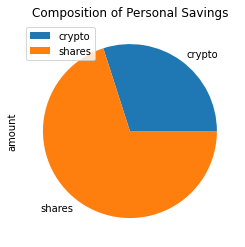

In [86]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [87]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount_savings = emergency_fund + total_shares + total_crypto
print(f"The total amount of savings is ${total_amount_savings:0.2f}")

# Validate saving health
if total_amount_savings >= emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_amount_savings == emergency_fund:
    print("Congratulations! You have met your financial goal.")
else:
    print("Unfortunately, You are ${emergency_fund-total_amount_savings} from your financial goal.")

The total amount of savings is $94043.10
Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [88]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-19', tz='America/New_York').isoformat()

In [89]:
# Get 5 years' worth of historical data for SPY and AGG
timeframe = "1D"
tickers = ["AGG","SPY"]
weights = [.40,.60]

df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.index = df_stock_data.index.date
df_stock_data.head()

AGG                                         SPY          \
              open     high     low   close     volume    open    high   
2015-10-19  109.78  109.895  109.65  109.85  1289942.0  202.50  203.37   
2015-10-20  109.64  109.780  109.55  109.65  1672562.0  202.85  203.84   
2015-10-21  109.73  109.950  109.73  109.89  1119723.0  203.61  203.79   
2015-10-22  109.90  110.050  109.83  109.94  1817244.0  202.98  205.51   
2015-10-23  109.79  109.790  109.69  109.74  1344632.0  207.25  207.95   

                                         
                 low   close     volume  
2015-10-19  202.1300  203.33   61255929  
2015-10-20  202.5471  203.07   60081395  
2015-10-21  201.6500  201.82   83704739  
2015-10-22  202.8100  205.22  121670959  
2015-10-23  206.3000  207.51  103135843

In [90]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [91]:
# Printing the simulation input data
MC_returns.portfolio_data.head()

AGG                                                      SPY  \
              open     high     low   close     volume daily_return    open   
2015-10-19  109.78  109.895  109.65  109.85  1289942.0          NaN  202.50   
2015-10-20  109.64  109.780  109.55  109.65  1672562.0    -0.001821  202.85   
2015-10-21  109.73  109.950  109.73  109.89  1119723.0     0.002189  203.61   
2015-10-22  109.90  110.050  109.83  109.94  1817244.0     0.000455  202.98   
2015-10-23  109.79  109.790  109.69  109.74  1344632.0    -0.001819  207.25   

                                                              
              high       low   close     volume daily_return  
2015-10-19  203.37  202.1300  203.33   61255929          NaN  
2015-10-20  203.84  202.5471  203.07   60081395    -0.001279  
2015-10-21  203.79  201.6500  201.82   83704739    -0.006156  
2015-10-22  205.51  202.8100  205.22  121670959     0.016847  
2015-10-23  207.95  206.3000  207.51  103135843     0.011159

In [92]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004027,1.005643,0.998235,0.982321,0.999658,1.006313,0.996287,1.014919,0.995136,0.997797,...,0.994701,0.993866,1.005668,1.003421,0.988519,1.014763,0.996797,1.003189,1.008670,0.992151
2,1.017406,1.007513,0.995224,0.977271,0.992756,1.004585,0.992370,1.014193,0.995020,0.999197,...,0.994526,0.999092,1.017008,1.005817,1.001925,1.025260,1.000200,1.017690,1.021823,0.996688
3,1.014690,0.992217,0.998407,0.991198,0.985004,0.997552,0.998364,1.008089,0.999012,1.000797,...,0.979466,0.998707,1.004774,1.000086,1.013485,1.035242,1.004124,1.019221,1.017830,0.996521
4,1.025266,0.994121,0.998238,0.978999,0.985066,0.994000,0.987537,1.008381,1.004366,1.000542,...,0.980075,0.990609,0.992718,1.003784,1.004919,1.040277,0.998233,1.027487,1.013725,0.993146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.853244,16.384086,10.478916,15.097586,9.125018,24.103652,2.116946,2.434317,7.405864,9.396497,...,6.258343,5.083906,13.504771,9.651357,4.683940,4.386521,3.240237,10.834545,17.888262,6.124764
7557,5.898093,16.451046,10.491513,15.126098,9.100916,24.318079,2.125508,2.437483,7.393155,9.505438,...,6.230488,5.034218,13.560808,9.690007,4.685498,4.400851,3.238314,10.803653,18.036039,6.085980
7558,5.895832,16.384619,10.520381,15.103177,9.111122,24.240292,2.143049,2.411973,7.378137,9.515025,...,6.246847,4.976694,13.412693,9.741814,4.708253,4.377280,3.265440,10.768704,17.797976,6.117810
7559,5.873138,16.354636,10.544536,15.326821,9.138843,24.685082,2.146525,2.427083,7.365330,9.644098,...,6.223194,4.931196,13.445068,9.781139,4.731680,4.372467,3.299921,10.847522,17.774146,6.062483


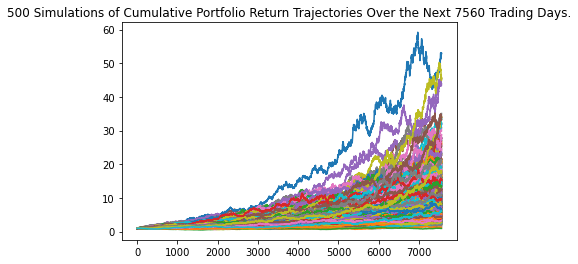

In [93]:
# Plot simulation outcomes
plot_one = MC_returns.plot_simulation()

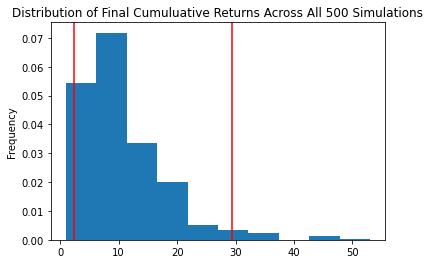

In [94]:
# Plot probability distribution and confidence intervals
plot_dist_one = MC_returns.plot_distribution()

### Retirement Analysis

In [95]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_one = MC_returns.summarize_cumulative_return()

# Print summary statistics
print(stats_one)

count           500.000000
mean             10.704879
std               7.287719
min               0.941131
25%               5.750514
50%               8.945017
75%              13.902787
max              53.030175
95% CI Lower      2.314345
95% CI Upper     29.429009
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [96]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stats_one[8]*20000,2)
ci_upper = round(stats_one[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $46286.9 and $588580.17


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [97]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(stats_one[8]*30000,2)
ci_upper = round(stats_one[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $69430.36 and $882870.26


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [98]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_returns_two = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [99]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_returns_two.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005521,1.006435,1.005698,1.009473,1.012209,1.002650,0.993757,1.014106,0.992104,0.996539,...,1.008310,1.004839,1.002649,1.006552,1.012039,0.990417,1.006378,1.004813,1.001582,1.002202
2,0.996538,1.008932,1.012379,1.006637,1.013958,0.993096,1.003472,1.001761,0.992884,0.984772,...,0.998637,1.011620,1.006260,1.007746,1.025618,0.997684,1.011378,1.018892,0.999994,0.995146
3,0.984619,1.010404,1.017971,1.013994,1.015151,0.982289,0.995420,1.001042,0.986030,0.991867,...,1.003093,1.022697,1.011708,1.020036,1.031682,1.003127,1.016229,1.015488,0.997144,1.002142
4,0.984694,1.011280,1.022696,1.006134,1.020414,0.976567,1.000406,1.003733,0.990828,0.976056,...,1.010546,1.023512,1.013789,1.028576,1.022280,1.005838,1.025993,1.014725,0.999784,1.006277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.838896,0.961682,1.538193,1.306551,1.693073,1.604859,1.386781,1.261511,0.999435,0.840002,...,1.505739,1.063659,1.656854,1.577324,1.623161,2.034529,1.144002,1.103703,0.952107,3.204804
1257,1.848793,0.951493,1.528629,1.317165,1.708403,1.602256,1.399574,1.265771,0.993206,0.833346,...,1.501775,1.056385,1.653230,1.601831,1.639535,2.041594,1.140578,1.099263,0.955103,3.189972
1258,1.856630,0.947683,1.524414,1.314307,1.715268,1.602713,1.399299,1.245874,0.994136,0.830694,...,1.507392,1.050596,1.625777,1.589929,1.632738,2.019827,1.141819,1.090044,0.954941,3.201888
1259,1.862751,0.949042,1.554130,1.302688,1.726807,1.600119,1.393402,1.252372,0.993214,0.834051,...,1.525661,1.049115,1.615171,1.599482,1.632632,2.003438,1.142052,1.088314,0.948089,3.185730


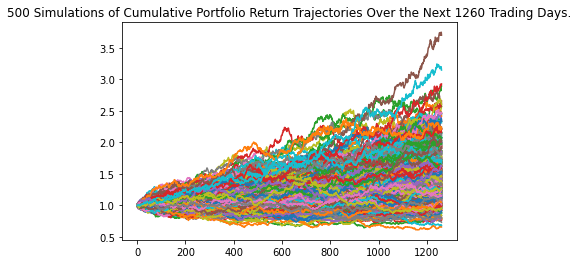

In [100]:
# Plot simulation outcomes
plot_two = MC_returns_two.plot_simulation()

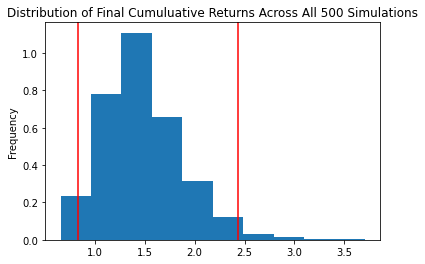

In [101]:
# Plot probability distribution and confidence intervals
plot_dist_two = MC_returns_two.plot_distribution()

In [102]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_two = MC_returns_two.summarize_cumulative_return()

# Print summary statistics
print(stats_two)

count           500.000000
mean              1.488743
std               0.409323
min               0.657454
25%               1.209837
50%               1.440358
75%               1.704142
max               3.705480
95% CI Lower      0.836568
95% CI Upper      2.434938
Name: 1260, dtype: float64


In [103]:
# Set initial investment
initial_investment_two = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(stats_one[8]*60000,2)
ci_upper_five = round(stats_one[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_two} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $138860.71 and $1765740.51


### Ten Years Retirement Option

In [104]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_returns_three = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [105]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_returns_three.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998831,1.000818,1.002621,1.000085,0.994446,0.991831,0.996099,1.006336,1.006171,0.995480,...,0.992973,0.995457,1.006416,0.998915,1.008230,1.005994,0.988983,1.012990,1.000966,1.003556
2,1.012168,0.991224,1.012982,0.995005,1.003472,0.994799,1.000811,1.009406,0.994298,0.997614,...,1.003162,1.004780,0.997609,0.998400,1.003681,1.021514,0.984837,1.012853,0.990447,0.991866
3,1.003542,0.982073,1.016177,0.985183,1.010356,0.994127,1.003358,1.012249,0.989669,0.994765,...,0.996249,1.012756,0.996038,0.997313,1.000625,1.020366,0.995957,1.007263,0.990595,0.987937
4,1.018580,0.980268,1.015495,0.979434,1.008969,1.007295,0.992892,1.016051,1.009503,1.008453,...,1.001115,1.006829,0.990776,0.982740,1.000647,1.007349,0.997308,1.004468,0.997161,0.978449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.841671,1.278256,5.390526,1.754462,2.399034,3.146854,1.644921,1.989694,3.490708,1.802711,...,1.858099,2.334898,1.263857,1.204329,1.610034,1.642754,3.494020,2.480208,2.450998,1.926684
2517,1.837326,1.263358,5.381176,1.758717,2.459833,3.137671,1.622677,1.994241,3.498345,1.805910,...,1.842387,2.337191,1.260719,1.196474,1.639809,1.642951,3.517453,2.490201,2.462372,1.918494
2518,1.810766,1.265602,5.354598,1.739796,2.470185,3.162083,1.643370,1.985364,3.528034,1.797231,...,1.810731,2.321303,1.266852,1.184903,1.615609,1.649463,3.518063,2.487618,2.493874,1.896098
2519,1.814656,1.269481,5.355993,1.748777,2.489717,3.157927,1.643605,1.975367,3.523827,1.794048,...,1.801683,2.361615,1.263167,1.175548,1.607927,1.628827,3.463668,2.502452,2.512532,1.909885


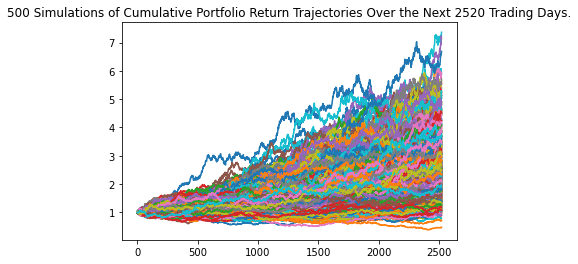

In [106]:
# Plot simulation outcomes
plot_three = MC_returns_three.plot_simulation()

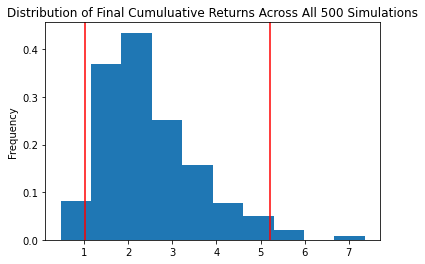

In [107]:
# Plot probability distribution and confidence intervals
plot_dist_three = MC_returns_three.plot_distribution()

In [108]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_three = MC_returns_three.summarize_cumulative_return()

# Print summary statistics
print(stats_three)

count           500.000000
mean              2.514557
std               1.092074
min               0.464916
25%               1.732451
50%               2.336863
75%               3.050840
max               7.365298
95% CI Lower      1.015196
95% CI Upper      5.207370
Name: 2520, dtype: float64


In [109]:
# Set initial investment
initial_investment_three = 80000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(stats_one[8]*80000,2)
ci_upper_ten = round(stats_one[9]*80000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_three} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $80000 in the portfolio over the next 10 years will end within in the range of $185147.61 and $2354320.69
